In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [12]:
x = []
y = []
vx = []
vy = []
acc_x_list = []
acc_y_list = []
jerk_x_list = []
jerk_y_list = []
time = []


# R = 15
# v = 7
R = 2
v = 2
T = 2 * math.pi * R / v
print("T is:", T)
omega = 2 * math.pi / T
print("omega is:", omega)
A = R
acc_x = -R * math.pow(omega, 2)
acc_y = 0

vx_t = 0
vy_t = 0

x_pos_init = 0
y_pos_init = 0



# jerk = A * math.pow(omega, 3) * math.cos(t)
# jerk = -A * math.pow(omega, 3) * math.sin(t)
print(acc_x, acc_y, vx_t, vy_t, x_pos, y_pos, omega)


T is: 6.283185307179586
omega is: 1.0
-2.0 0 0 0 1.1554300888914635 1.6324770472151406 1.0


In [13]:
for t in np.arange(0, 37.9, 0.1):
        
        temp = omega * t
        time.append(t)
        jerk_x = A * math.pow(omega, 3) * math.cos(temp)
        jerk_y = A * math.pow(omega, 3) * math.sin(temp)
        
        jerk_x_list.append(jerk_x)
        jerk_y_list.append(jerk_y)
        
        acc_x = A * math.pow(omega, 2) * math.sin(temp)
        acc_y = -A * math.pow(omega, 2) * math.cos(temp)
#         acc_x += jerk_x * 0.1;
#         acc_y += jerk_y * 0.1;
        acc_x_list.append(acc_x)
        acc_y_list.append(acc_y)
        
        vx_t = -A * math.pow(omega, 1) * math.cos(temp)
        vy_t = -A * math.pow(omega, 1) * math.sin(temp)
#         vx_t += acc_x * 0.1;
#         vy_t += acc_y * 0.1;
        vx.append(vx_t)
        vy.append(vy_t)
#         vx_t = vx_t + 0.1 * acc_x
#         vy_t = vy_t + 0.1 * acc_y

        x_pos = -A * math.sin(temp) + 0
        y_pos = A * math.cos(temp) +0
#         x_pos += vx_t * 0.1
#         y_pos += vy_t * 0.1
        
        
        x.append(x_pos)
        y.append(y_pos)

0.0 2.0 -2.0 -0.0 0.0 -2.0 2.0 0.0


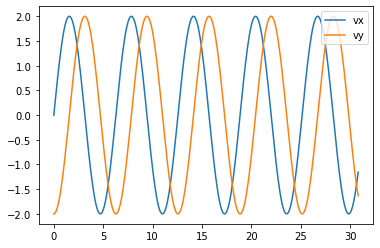

In [14]:
# plt.plot(time, acc_x_list, label='acc_x')
# plt.plot(time, acc_y_list, label='acc_y')
plt.plot(time, acc_x_list, label='vx')
plt.plot(time, acc_y_list, label='vy')
# plt.plot(x, y)
plt.legend(loc=1)
print(x[0], y[0], vx[0], vy[0], acc_x_list[0], acc_y_list[0], jerk_x_list[0], jerk_y_list[0])

In [6]:
from scipy.io import savemat
file_name = 'data.mat'
savemat(file_name, {'x':x, 'y':y, 'vx':vx, 'vy':vy, 'acc_x':acc_x_list, 
                   'acc_y':acc_y_list, 'jerk_x':jerk_x_list, 'jerk_y':jerk_y_list})


print("begin the verify")
print(5**5)

begin the verify
3125


In [133]:
guidance_t = 5.0;
import numpy as np
coef = np.array([[720, -360, 60 * (guidance_t**2)], [-360 * guidance_t, 168 * guidance_t**2, -24 * guidance_t**3],
               [60 * guidance_t**2, -24 * guidance_t**3, 3 * guidance_t**4]]) / (guidance_t ** 5)
print(coef)

[[ 0.2304 -0.1152  0.48  ]
 [-0.576   1.344  -0.96  ]
 [ 0.48   -0.96    0.6   ]]


In [134]:
final_state_x = np.array([-15, 0, -3.2666])  ## initial values for x and y
final_state_y = np.array([10.6066, 4.9497, -2.30988]);

result_coef_x = coef.dot(final_state_x)   ## the costate for the optimal control
result_coef_y = coef.dot(final_state_y)
print(result_coef_x, result_coef_y)

[-5.023968 11.775936 -9.15996 ] [ 0.7648128  2.76048   -1.046472 ]


In [136]:
time = np.arange(0, guidance_t + 0.1, 0.1)
print('time len is:', len(time))

state_x = np.zeros((3, len(time)))
state_y = np.zeros((3, len(time)))
for i in range(len(time)):
    state_coef = np.array([[1/120 * time[i]**5, 1/24 * time[i]**4, 1/6 * time[i]**3],
                          [1/24 * time[i]**4, 1/6 * time[i]**3, 1/2 * time[i]**2],
                          [1/6 * time[i]**3, 1/2 * time[i]**2, time[i]]])
    state_x[:,i] = state_coef.dot(result_coef_x)
    state_y[:,i] = state_coef.dot(result_coef_y)
print(result_coef_x)

time len is: 51
[-5.023968 11.775936 -9.15996 ]


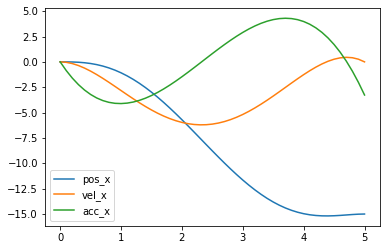

In [131]:
plt.plot(time, state_x[0,:], label="pos_x")
plt.plot(time, state_x[1,:], label="vel_x")
plt.plot(time, state_x[2,:], label='acc_x')
# plt.plot(time, state_y[0,:], label="pos_y")
# plt.plot(time, state_y[1,:], label='vel_y')
# plt.plot(time, state_y[2,:], label='acc_y')
plt.legend()

In [108]:
print(state_x[1,:])

[ 0.00000000e+00  4.05353128e-02  1.55206970e-01  3.33756442e-01
  5.66115720e-01  8.42407320e-01  1.15294428e+00  1.48823015e+00
  1.83895903e+00  2.19601551e+00  2.55047472e+00  2.89360231e+00
  3.21685445e+00  3.51187783e+00  3.77050968e+00  3.98477772e+00
  4.14690022e+00  4.24928597e+00  4.28453426e+00  4.24543493e+00
  4.12496832e+00  3.91630531e+00  3.61280730e+00  3.20802619e+00
  2.69570444e+00  2.06977500e+00  1.32436136e+00  4.53777516e-01
 -5.47471992e-01 -1.68469212e+00 -2.96299728e+00 -4.38731139e+00
 -5.96236783e+00 -7.69270945e+00 -9.58268860e+00 -1.16364671e+01
 -1.38580162e+01 -1.62511167e+01 -1.88193589e+01 -2.15661424e+01
 -2.44946765e+01 -2.76079798e+01 -3.09088806e+01 -3.44000164e+01
 -3.80838344e+01 -4.19625911e+01 -4.60383526e+01 -5.03129945e+01
 -5.47882018e+01 -5.94654690e+01 -6.43461000e+01]
